In [1]:
# Importing Data preprocessing  libraries
import numpy as np 
import pandas as pd

In [2]:
# Data Visualiztion
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Model Building and vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score , confusion_matrix, roc_auc_score

In [4]:
# Data Acquisition
df_ = pd.read_csv("Tweets.csv") # Actually this dataset has 3 labels we will build another model for binary class later for that we save it as df_

In [5]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df = df_[['airline_sentiment','text']]

In [7]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [8]:
# Checking the null values
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

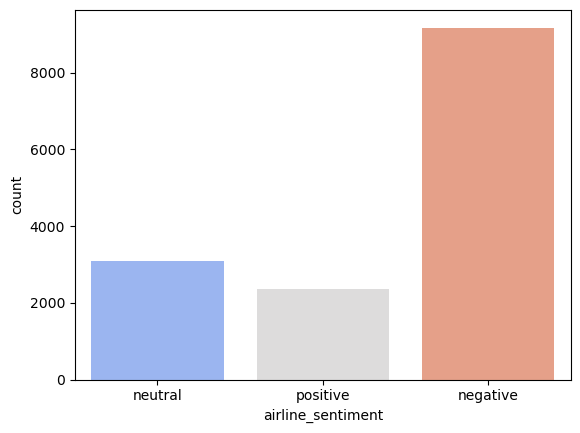

In [10]:
# Target Value Balance
df['airline_sentiment'].value_counts()
print()
sns.countplot(x='airline_sentiment',data=df,palette='coolwarm')
# As we can see the negative target class has more impact than others as most of the users make comment 
# Only about the complaints 
# We have to go with other evalution metrcis like confusion_matrix and so forth

In [11]:
numeric_cat = {"neutral":2,"positive":1,"negative":0}
df['sentiment'] = df['airline_sentiment'].map(numeric_cat)

C:\Users\reliance\AppData\Local\Temp\ipykernel_11796\4061541051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['airline_sentiment'].map(numeric_cat)


In [12]:
df

,airline_sentiment,text,sentiment
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
...,...,...,...
14635,positive,@AmericanAir thank you we got on a different f...,1
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,neutral,@AmericanAir Please bring American Airlines to...,2
14638,negative,"@AmericanAir you have my money, you change my ...",0


In [13]:
# Train test split 
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
X_test

8515     @JetBlue I'll pass along the advice. You guys ...
3439     @united I sent you a dm with my file reference...
6439     @SouthwestAir Black History Commercial is real...
5112     @SouthwestAir why am I still in Baltimore?! @d...
5645     @SouthwestAir SEA to DEN. South Sound Volleyba...
                               ...                        
11412    Yes but I will nvr fly w/ @USAirways I missed ...
10581    @USAirways Official time of call 3 hours 10 mi...
1986     @united On hold 2X 60 min ea. Trying to bk a t...
3267     @united wasting time at baggage claim thanks t...
5670                      @SouthwestAir Deborah helped me💁
Name: text, Length: 2928, dtype: object

In [15]:
# Vector Models
vectorizer = CountVectorizer()

In [16]:
X_train = vectorizer.fit_transform(X_train)

In [17]:
X_train.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
# How much % data is actually non zero
((X_train != 0).sum() / (np.prod(X_train.shape)))*100

0.12109544789264091

In [19]:
model = LogisticRegression(max_iter=500)

In [20]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [21]:
X_test = vectorizer.transform(X_test)

In [22]:
y_pred = model.predict(X_test)

In [23]:
print("Train: ",model.score(X_train,y_train))
print("Test: ",model.score(X_test,y_test))

Train:  0.9561987704918032
Test:  0.8008879781420765


In [24]:
cm = confusion_matrix(y_test,y_pred,normalize='true')
cm
# normalize is just the values after adding row wise we get 1(% weighted to each class)
# Negative class has high weightage

array([[0.89375685, 0.02683461, 0.07940854],
       [0.16496945, 0.69246436, 0.14256619],
       [0.30114566, 0.08837971, 0.61047463]])

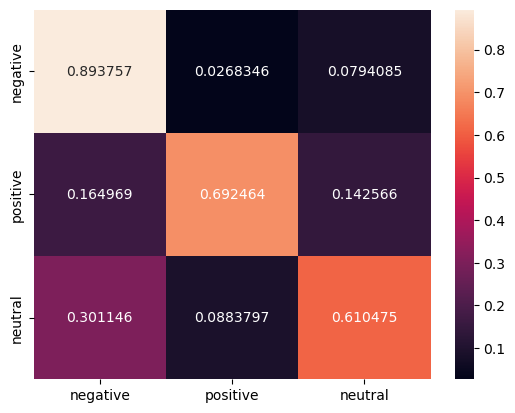

In [25]:
# Plotting confusiton metrix
def plot_cm(cm):
    classes = ['negative','positive','neutral']
    df_cm = pd.DataFrame(cm,index=classes,columns=classes)
    sns.heatmap(df_cm,annot=True,fmt='g')
    
plot_cm(cm)
# We can see that model performs best for negative class
# In the 2nd row we can see that when the prediction is not correct about the +ve class it has predicted -ve classes more 
# same for the neutral (biased towards negative class)

In [29]:
# Sentiment analysis for binary Class
values = [1,0]
mask = df['sentiment'].isin(values)
df_bin = df[mask]

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

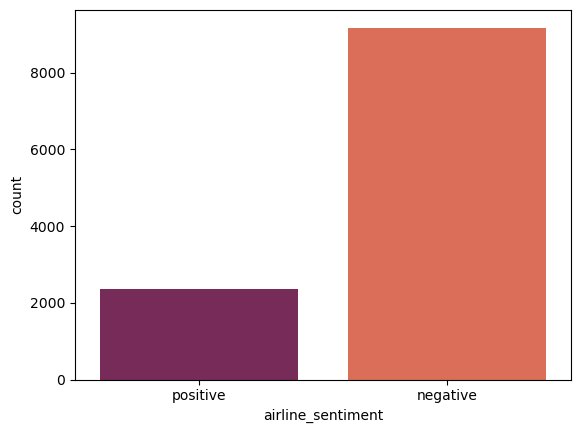

In [40]:
df_bin['airline_sentiment'].value_counts()
print()
sns.countplot(x='airline_sentiment',data=df_bin,palette="rocket")

In [41]:
# Classes are imbalanced

In [96]:
X = df_bin['text']
y = df_bin['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [97]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [98]:
lr = LogisticRegression(max_iter=500,class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [99]:
y_pred = lr.predict(X_test)

In [100]:
print("f1 :",f1_score(y_test,y_pred))

f1 : 0.8095238095238095


In [101]:
cm_bin = confusion_matrix(y_test,y_pred,normalize='true')

In [102]:
def plot_cm_bin(cm):
    classes = ['negative','positive']
    df_cm= pd.DataFrame(cm_bin,index=classes,columns=classes)
    sns.heatmap(df_cm,annot=True,fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    

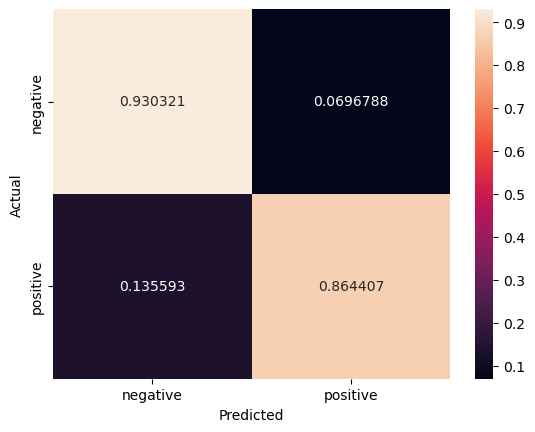

In [103]:
plot_cm_bin(cm_bin)

In [104]:
print("Coefficient: ",lr.coef_)
print("y_interncept: ",lr.intercept_)

Coefficient:  [[-0.42182022  0.36015801 -0.46209921 ... -0.11299963 -0.30740151
  -0.0628543 ]]
y_interncept:  [0.58627293]


In [105]:
word_to_index = vectorizer.vocabulary_

In [106]:
print(word_to_index)

{'southwestair': 9193, 'please': 7669, 'hire': 5166, 'an': 1553, 'efficiency': 3873, 'consultant': 3027, 'to': 9916, 'manage': 6400, 'your': 11077, 'phx': 7593, 'baggage': 1942, 'checkin': 2657, 'way': 10729, 'many': 6418, 'open': 7241, 'kiosks': 5912, 'with': 10899, '100': 35, 'of': 7165, 'ppl': 7755, 'waiting': 10663, 'united': 10352, 'refused': 8228, 'boarding': 2197, 'nexus': 6939, 'confirmed': 2984, 'she': 8880, 'should': 8919, 'not': 7053, 'be': 2014, 'usairways': 10484, 'no': 6973, 'am': 1513, 'trying': 10086, 'get': 4754, 'on': 7211, 'plane': 7646, 'from': 4625, 'rno': 8492, 'and': 1559, 'the': 9752, 'gate': 4718, 'is': 5637, 'saying': 8678, 'flight': 4417, 'was': 10705, 'downgraded': 3736, 'lol': 6230, 'too': 9948, 'little': 6174, 'late': 6007, 'sarahpompei': 8643, 'don': 3701, 'bother': 2246, 'wasting': 10717, 'time': 9871, 'will': 10862, 'send': 8803, 'form': 4551, 'letter': 6094, 'amp': 1547, 'let': 6088, 'choose': 2705, 'gift': 4784, 'certificate': 2590, 'worstcustomerserv

In [107]:
# Let's Interpret our model
print("Most common positive words: ")
threshold = 1
cnt = 0
for word , index in word_to_index.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word,weight)
        cnt+=1
print("Most common positive words: ",cnt)

Most common positive words: 
consultant 1.045523040193883
flew 1.1728885450081215
watch 1.0193196701097105
dying 1.1510930775625974
services 1.4266698096993071
coffee 1.2556218690562553
inside 1.0394724465939371
ua1565 1.1838568134179455
layout 1.1061678494232021
evidently 1.4164575468407314
loc 1.0845740274347584
personnel 1.2760765595598047
ua1459 1.2126001306661587
awe1701 1.126727182818785
rid 1.4077921664641988
litter 1.0917702794219815
tripitpro 1.3979826417640704
ladies 1.1225329711098035
requests 1.096354000282209
hat 1.1060424490363807
evidence 1.3504423964665573
instance 1.1598777125929236
inserted 1.076493078311672
taylorlumsden 1.1739648469339337
lowdown 1.2463133976851033
bastards 1.0377660198723295
dirtiest 1.0531458878177795
patienceiswearingthin 1.2802518477965616
fcmostinnovative 1.4139507890370206
patches 1.1250128466064473
diane 1.0639497769448734
whining 1.3129530503319715
Most common positive words:  32


In [108]:
print("Most common Negative words: ")
threshold = 1
cnt = 0
for word , index in word_to_index.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word,weight)
        cnt+=1
print("Most common positive words: ",cnt)

Most common Negative words: 
disappearing -1.0319224999796837
hell -1.0799602457337116
pbi -1.4631534118060598
hindered -1.0686552224902865
b11 -1.4500182212824397
6kp4m0r1f7 -1.077161625293864
mrrenevendez -1.1070430204818036
refusing -1.3950567416443005
stucked -1.0236317924721903
mb3bjwgoap -1.3028802015979388
grouchy -1.0399437792337967
Most common positive words:  11
